<a href="https://colab.research.google.com/github/gopireddy99/Sentiment_Analysis_NLP/blob/main/sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using sample dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data/Reviews.csv',nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [3]:
# looking at the description of the reviews
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [4]:
# importing libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')
# lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x:str(TextBlob(x).correct()))
# lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


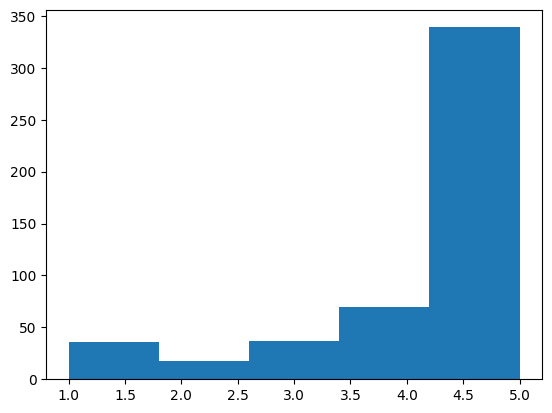

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [5]:
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [6]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [7]:
# Here we recreate a 'balanced' daatset
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
# printing score
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


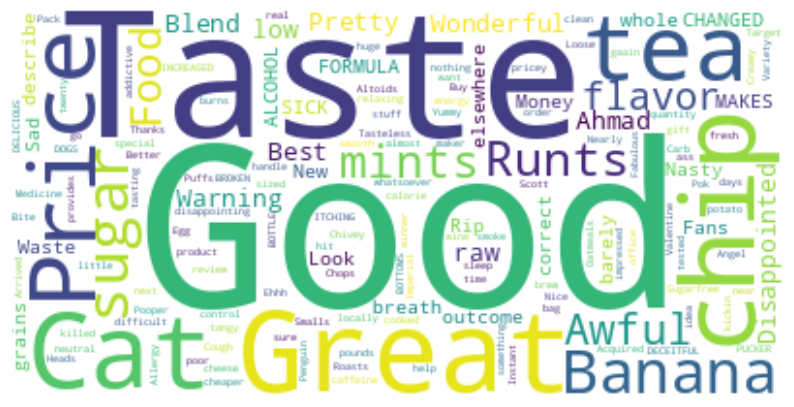

In [8]:
# let's build a word cloud looking at the 'summary' text
from wordcloud import WordCloud

reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# Now lets split the data into Negative and positive
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

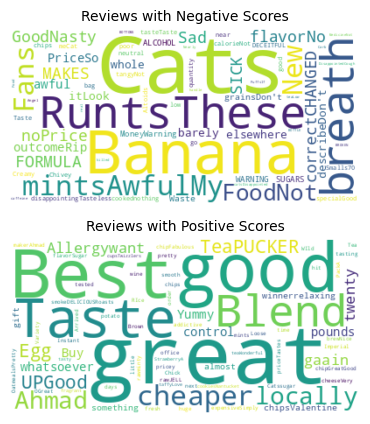

In [14]:
# create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
#plot
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores',fontsize=10)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Reviews with Positive Scores',fontsize=10)
plt.show()

# VADER Sentiment Analysis

In [15]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [17]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()

analyzer = SentimentIntensityAnalyzer()
# generating sentiment for all the sentence present in the dataset
emptyline = []
for row in df['Text']:
  vs = analyzer.polarity_scores(row)
  emptyline.append(vs)


In [18]:
#creating new dataframe with sentiments
df_sentiment = pd.DataFrame(emptyline)
df_sentiment.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.085,0.771,0.144,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


In [20]:
df_c = pd.concat([df.reset_index(drop=True),df_sentiment],axis=1)
df_c.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,0.932,0.068,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.599,0.401,0.9468


In [22]:
# convert scores into positive and negative sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0,'Positive','Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138,Positive


Sentiment
Positive    453
Negative     47
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

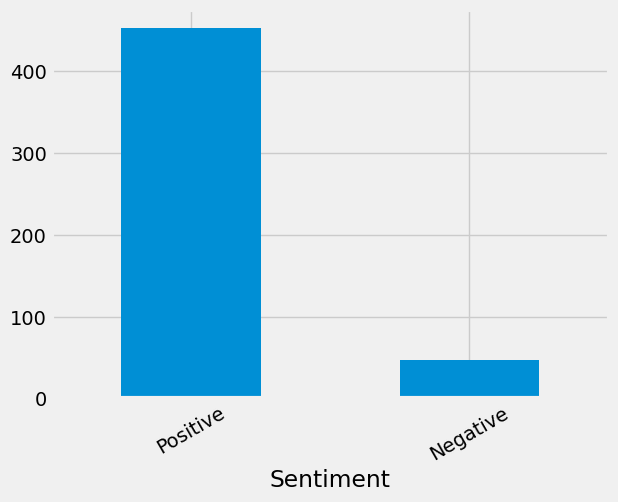

In [24]:
#plotting bargraph --
result = df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar',rot=30)